In [41]:
# PLACE ALL IMPORTS IN THIS CELL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# SET UP DATA

# convert csv to a pandas DataFrame format
train_df = pd.DataFrame.from_csv('data/train.csv')
test_df = pd.DataFrame.from_csv('data/test.csv')

/home/sn446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.
/home/sn446/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


In [3]:
# BASIC DATASET INFORMATION

# -- our train set is 1089 x 17
print(train_df.shape)
# -- our test set is 300 x 15 (the 2 missing columns are the label and a redundant field that resembles label)
print(test_df.shape)

(1089, 17)
(300, 15)


In [4]:
# FIGURE OUT LABEL DISTRIBUTION [~57% of dataset came from Android]

# create dataset with only positive labels -- 619 positive labels in training set
df_train_pos = train_df[train_df.label == 1]
# create dataset with only negative labels -- 470 negative labels in training set
df_train_neg = train_df[train_df.label == -1]
print("Number of positive [Android] training points: " + str(len(df_train_pos)))
print("Number of negative [iPhone] training points: " + str(len(df_train_neg)))
print("Percentage of training points from Android: " + str(len(df_train_pos)/train_df.shape[0]))

Number of positive [Android] training points: 619
Number of negative [iPhone] training points: 470
Percentage of training points from Android: 0.5684113865932048


In [5]:
# EXPLORE TIME FEATURE
print(train_df['created'])

id
0         7/12/16 0:56
1        7/11/16 22:18
2        7/11/16 21:40
3        7/11/16 19:51
4        7/11/16 11:57
5        7/10/16 18:58
6        7/10/16 18:42
7        7/10/16 18:27
8        7/10/16 12:02
9         7/9/16 21:22
10        7/9/16 15:18
11        7/8/16 23:26
12        7/8/16 21:31
13        7/8/16 14:32
14        7/8/16 13:20
15        7/8/16 11:02
16         7/8/16 1:52
17        7/7/16 20:09
18        7/7/16 20:06
19        7/7/16 20:04
20        7/7/16 18:07
21        7/7/16 11:33
22         7/7/16 1:34
23        7/6/16 21:58
24        7/6/16 14:06
25        7/6/16 14:01
26        7/6/16 13:24
27        7/6/16 13:12
28        7/6/16 13:08
29        7/6/16 12:31
             ...      
1059     1/16/16 19:32
1060     1/16/16 18:31
1061     1/16/16 18:26
1062     1/16/16 18:23
1063     1/16/16 18:22
1064     1/16/16 18:21
1065     1/16/16 16:11
1066     1/16/16 13:42
1067     1/16/16 13:31
1068      1/8/16 23:12
1069      1/8/16 22:36
1070      1/8/16 22:09
1071    

# Features of Interest

In [6]:
iphone = 0
http = 0
for i in range(1089):
    
    if "http" in train_df["text"][i]:
        http += 1
        if train_df["label"][i] == -1:
            iphone += 1
        
    
print(float(iphone)/http)

0.8682795698924731


In [7]:
android = 0
quote = 0

for i in range(1089):
    
    if '"' == train_df["text"][i][0]:
        quote += 1
        if train_df["label"][i] == 1:
            android += 1

print(float(android)/quote)
print(android)
print(quote)

0.985
197
200


In [8]:
android = 0
quote = 0

for i in range(1089):
    
    if '' in train_df["text"][i]:
        quote += 1
        if train_df["label"][i] == 1:
            android += 1

print(float(android)/quote)
print(android)
print(quote)

0.5684113865932048
619
1089


In [9]:
features = {}
number_android = {}

In [10]:
for i in range(1089):
    ws = kt.text_to_word_sequence(train_df['text'][i], filters = '"?!-')
    
    # Check to update current keys
    for j in features.keys():
        if j in ws:
            features[j] += 1
            
            if train_df['label'][i] == 1:
                number_android[j] += 1
            
    # Check for new keys
    for w in ws:
        if w not in features.keys():
            features[w] = 1
            number_android[w] = 0
            if train_df['label'][i]:
                number_android[w] += 1
    
    


NameError: name 'kt' is not defined

In [11]:
max_num = 0
for k in features:
    if "http" in k:
        print(k)
max_num

0

In [12]:
refined_features = {}
best_features = {}

for k in features:
    
    if features[k] > 10:
        p = float(number_android[k])/features[k]
        refined_features[k] = [features[k], number_android[k], float(number_android[k])/features[k]]
        
        if p > 0.9 or p < 0.1:
            best_features[k] = [p, features[k]]

In [13]:
best_features

{}

## More Potential Features
- Fake is android
- new is mostly android (not extremely good though)
- if there is a # then most likely iphone
- precesne of hell indicates android
- #trump2016 (is pretty good)

# Vocabulary Creation

In [14]:
import keras.preprocessing.text as kt

/home/sn446/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
words_frequency = {}

In [16]:
max_length = 0
for i in range(1089):
    ws = kt.text_to_word_sequence(train_df['text'][i], filters = '"?!-')
    max_length = max(max_length, len(ws))
    for w in ws:
        if w in words_frequency.keys():
            words_frequency[w] += 1
        else:
            words_frequency[w] = 1

In [17]:
print(vocab_size)

NameError: name 'vocab_size' is not defined

In [31]:
words = {}
words["http"] = 0

# Remove stuffs
for key in words_frequency.keys():
    if "http" in key:
        words["http"] += words_frequency[key]
    else:
        words[key] = words_frequency[key]

In [32]:
vocab_size = len(words.keys()) + 1
idx2word = {}
word2idx = {}
word2idx['END TOKEN'] = 0
idx2word[0] = 'END TOKEN'

counter = 0
for i in words.keys():
    counter += 1
    word2idx[i] = counter
    idx2word[counter] = i
vocab_sizee = len(word2idx.keys())

In [33]:
# Create dataset
x_data = np.zeros([1089, 32])
for i in range(1089):
    ws = kt.text_to_word_sequence(train_df['text'][i], filters = '"?!-')
    for j in range(len(ws)):
        if "http" in ws[j]:
            x_data[i, j] = word2idx["http"]
        elif words[ws[j]] > 10:
            x_data[i, j] = word2idx[ws[j]]


In [19]:
print(len(word2idx))

NameError: name 'word2idx' is not defined

In [20]:
y_data = train_df['label']

In [21]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                   # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

Created two dictionaries **word2idx** and **idx2word**

In [22]:
max_length = 32
hidden_size = 1000

In [23]:
from keras.layers import Embedding, LSTM, Dropout, TimeDistributed, Activation, Input, Dense, Flatten
from keras.models import Sequential

In [82]:
model = Sequential()
model.add(Embedding(vocab_size, hidden_size, input_length = max_length))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(LSTM(hidden_size, return_sequences=False))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('softmax'))

ValueError: Input 0 is incompatible with layer flatten_1: expected min_ndim=3, found ndim=2

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'model' is not defined

In [24]:
model.fit(x_data, y_data, epochs = 3, batch_size = 32)

NameError: name 'model' is not defined

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 1000)          4802000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32, 1000)          8004000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 32, 1000)          8004000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 1000)          0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 32, 4802)          4806802   
_________________________________________________________________
activation_2 (Activation)    (None, 32, 4802)          0         
Total params: 25,616,802
Trainable params: 25,616,802
Non-trainable params: 0
________________________________________________________________

In [26]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [27]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [28]:

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [29]:
x_reverse_data = np.zeros([1089,32])
for i in range(1089):
    for j in range(32):
        x_reverse_data[i, 31 - j] = x_data[i,j]

In [38]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=32))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 32)            130848    
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 150,049
Trainable params: 150,049
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
from keras.callbacks import Callback
class Metrics(Callback):
    def __init__(self):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
            
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict, average = None)
        _val_recall = recall_score(val_targ, val_predict, average = None)
        _val_precision = precision_score(val_targ, val_predict, average = None)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print(len(_val_precision))
        print ("-- val_f1: " + str(_val_f1) +" — val_precision: "  + str(_val_precision) + "  — val_recall: " + str(_val_recall))
        return
                       
metrcs = Metrics()

In [26]:
x = model.predict(x_reverse_data)

In [47]:
import matplotlib.pyplot as plt

(array([434.,   3.,   1.,   2.,   1.,  53., 151., 190., 159.,  95.]),
 array([0.        , 0.09726605, 0.1945321 , 0.29179814, 0.38906419,
        0.48633024, 0.58359629, 0.68086234, 0.77812839, 0.87539443,
        0.97266048]),
 <a list of 10 Patch objects>)

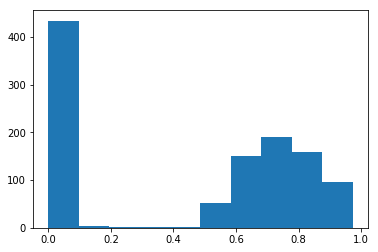

In [49]:
plt.hist(x)

In [44]:
y = y.reshape(1089)

In [45]:
sum(y == y_data)/1089

0.5381083562901745

In [39]:
model.fit(x_data, y_data, batch_size=16, epochs=25, shuffle=True, verbose = 1)

Epoch 1/25
1089/1089 [==============================] - 20s 19ms/step - loss: -1.1894 - acc: 0.0771
Epoch 2/25
1089/1089 [==============================] - 3s 3ms/step - loss: -3.0292 - acc: 0.3646
Epoch 3/25
1089/1089 [==============================] - 3s 3ms/step - loss: -3.2776 - acc: 0.4123
Epoch 4/25
1089/1089 [==============================] - 3s 3ms/step - loss: -3.8753 - acc: 0.4490
Epoch 5/25
1089/1089 [==============================] - 3s 3ms/step - loss: -3.6824 - acc: 0.4086
Epoch 6/25
1089/1089 [==============================] - 3s 3ms/step - loss: -4.1122 - acc: 0.4454
Epoch 7/25
1089/1089 [==============================] - 3s 3ms/step - loss: -4.3348 - acc: 0.4839
Epoch 8/25
1089/1089 [==============================] - 3s 3ms/step - loss: -4.5583 - acc: 0.4858
Epoch 9/25
1089/1089 [==============================] - 3s 3ms/step - loss: -4.2679 - acc: 0.4720
Epoch 10/25
1089/1089 [==============================] - 3s 3ms/step - loss: -4.3006 - acc: 0.4591
Epoch 11/25
1089/

In [24]:
print(y_data.shape)

(1089,)


In [40]:
p = model.predict(x_data)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [53]:
def getx():
    return 1

In [55]:
a, b = getx()

TypeError: 'int' object is not iterable

(array([504.,   7.,   6.,   7.,   8.,   8.,  16.,  51., 205., 277.]),
 array([2.87107179e-19, 9.60114539e-02, 1.92022908e-01, 2.88034362e-01,
        3.84045815e-01, 4.80057269e-01, 5.76068723e-01, 6.72080177e-01,
        7.68091631e-01, 8.64103085e-01, 9.60114539e-01]),
 <a list of 10 Patch objects>)

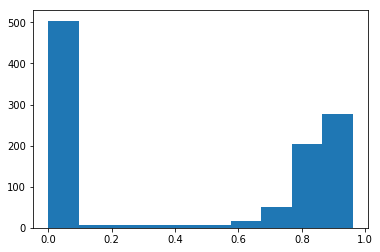

In [42]:
plt.hist(p)